In [ ]:
import os
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
import pickle

FILE_NAME = "../data/raw_data/origin_data.csv"
SAVE_DIR = "../data/"

def stratified_choice_train_test_split(X, test_size=0.2, random_state=42):
  """ 라벨별로 일정 비율로 추출합니다 (ruw_label_to_num.pkl 경로 확인 필수)"""
  split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
  for train_idx, test_idx in split.split(X, X["category"]):
      X_train = X.iloc[train_idx]
      X_test = X.iloc[test_idx]
  return X_train, X_test

pd_dataset = pd.read_csv(FILE_NAME)
pd_train, pd_test = stratified_choice_train_test_split(pd_dataset, test_size=0.1, random_state=42)
pd_train, pd_validation = stratified_choice_train_test_split(pd_train, test_size=0.1, random_state=42)
if not os.path.exists(SAVE_DIR):
    os.mkdir(SAVE_DIR)
pd_train["id"] = list(range(len(pd_train)))
pd_validation["id"] = list(range(len(pd_train),len(pd_train)+len(pd_validation)))
pd_test["id"] = list(range(len(pd_train)+len(pd_validation),len(pd_train)+len(pd_validation)+len(pd_test)))
pd_train.to_csv(os.path.join(SAVE_DIR, "train.csv"), index=False)
pd_validation.to_csv(os.path.join(SAVE_DIR,"validation.csv"), index=False)
pd_test.to_csv(os.path.join(SAVE_DIR, "test.csv"), index=False)

print("========== train test split 완료 ==========")

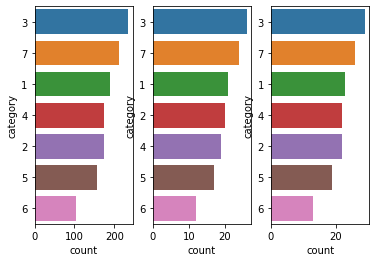

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(1, 4):
    axes = fig.add_subplot(1, 3, i)
    if i == 1:
        sns.countplot(y='category', data=pd_train, order=pd_train['category'].value_counts().index)
    elif i==2:
        sns.countplot(y='category', data=pd_validation, order=pd_validation['category'].value_counts().index)
    else:
        sns.countplot(y='category', data=pd_test, order=pd_test['category'].value_counts().index)


In [60]:
pd_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     1540 non-null   int64 
 1   document_id  1540 non-null   int64 
 2   question     1540 non-null   object
 3   answers      1540 non-null   object
 4   context      1540 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.3+ KB


In [64]:
from tqdm import tqdm
meeting_contexts = {}
for i in tqdm(range(len(pd_test))):
    dict_temp = {
        'text': pd_test.iloc[i]['context'],
        'document_id': str(pd_test.iloc[i]['document_id']),
        'corpus_source': None, 
        'url': 'TODO', 
        'domain': None, 
        'title': f"회의 # {pd_test.iloc[i]['document_id']}", 
        'author': None, 
        'html': None,
    }
    meeting_contexts[str(i)] = dict_temp

100%|██████████| 154/154 [00:00<00:00, 2825.74it/s]


In [ ]:
import json

with open('meeting_collection.json', 'w', encoding='utf-8') as f:
    json.dump(meeting_contexts, f)